In [14]:
import urllib
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Create categories plot

In [2]:
params = urllib.parse.quote_plus('DRIVER={ODBC Driver 18 for SQL Server};SERVER=adyserver2.database.windows.net;DATABASE=ADY201m_Lab04;\
                                    UID=admin99;PWD=Matkhau@123')

engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

df = pd.read_sql_table('tblDisaster', engine)

In [10]:
top10_categories = df.iloc[:, 4:].sum().sort_values(ascending=False).head(10)
top10_categoriesdf = pd.DataFrame(top10_categories)
top10_categoriesdf.reset_index(inplace=True)
top10_categoriesdf.columns = ['category','counts']
top10_categoriesdf.to_csv('top10_categories.csv', index=False)

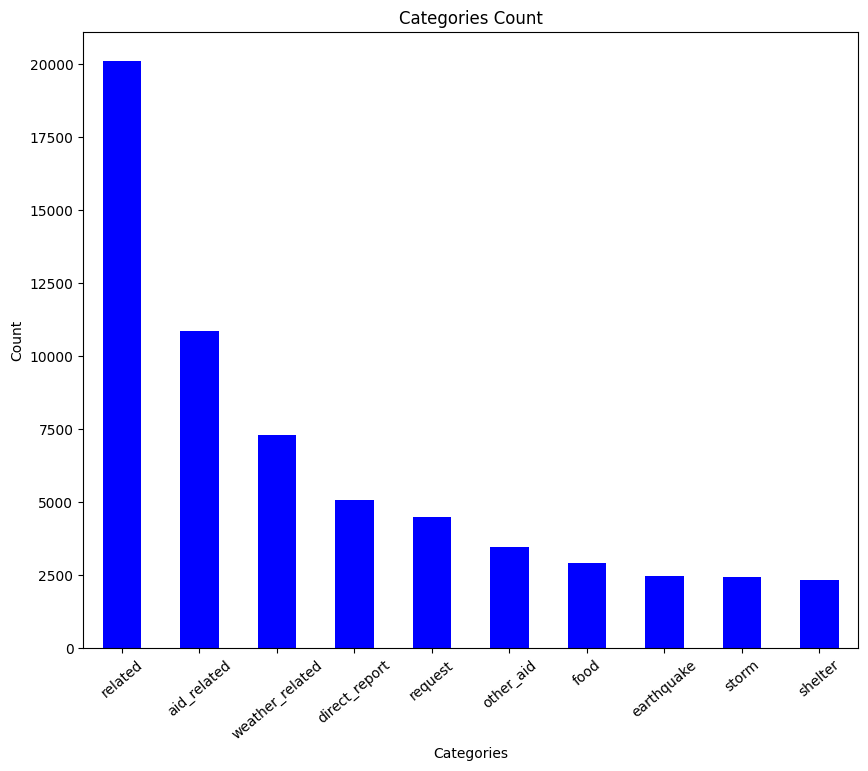

In [11]:
plt.figure(figsize=(10,8))
top10_categories.plot(kind='bar', color='blue')
plt.title('Categories Count')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.show()

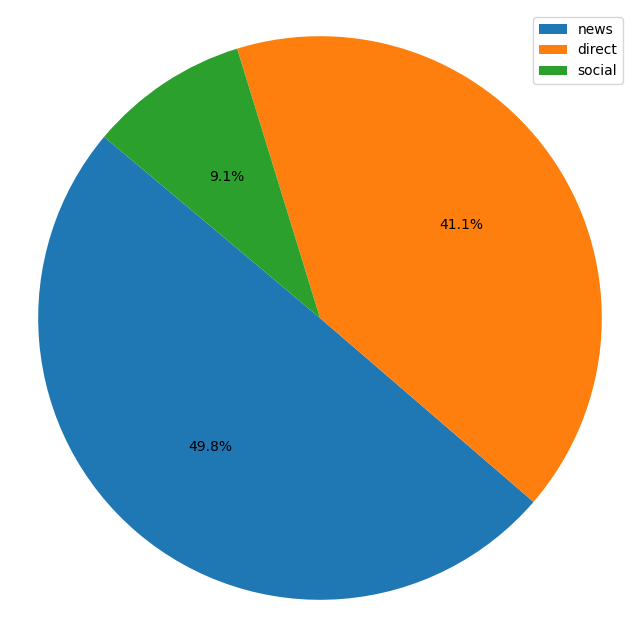

In [21]:
genre_count = df['genre'].value_counts()
genre_count
plt.figure(figsize=(8, 8))
plt.pie(genre_count, autopct='%1.1f%%', startangle=140)

# Thêm ô chú thích
plt.legend(genre_count.index, loc='best')

plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.show()